# Word vectors in Gensim

In [1]:
import gensim.downloader as api

All gensim models are listed on this page: https://github.com/RaRe-Technologies/gensim-data

In [3]:
# loading pre-trained model with large dataset(google news articles - about 100 billion words)
vw = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [55]:
# getting the vector for a particular word
happy_vector = vw['happy']
happy_vector.shape

(300,)

In [3]:
# checking similarity between two words
vw.similarity(w1="good",w2="great")

0.72915095

In [4]:
vw.similarity(w1="father",w2="son")

0.8933086

In [5]:
vw.similarity(w1="good",w2="bad")

0.7190051

In [6]:
# checking the all the similar words for a given word
vw.most_similar('hero')

[('heroes', 0.7713842391967773),
 ('heros', 0.6476413607597351),
 ('idol', 0.583287239074707),
 ('villain', 0.5617582201957703),
 ('heroic', 0.5593931078910828),
 ('cult_hero', 0.556943953037262),
 ('warrior', 0.5568825006484985),
 ('folk_hero', 0.55190509557724),
 ('Hero', 0.5432050824165344),
 ('savior', 0.5411152839660645)]

In [7]:
vw.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

In [8]:
vw.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [9]:
# performing arithmetic operations on words
# king - man + woman = Queen
vw.most_similar(positive=['king','woman'],negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [21]:
# France - Paris + Delhi = India
vw.most_similar(positive=['France','Delhi'],negative=['Paris'])

[('India', 0.7110559940338135),
 ('Haryana', 0.6130647659301758),
 ('Delhi_Oct.##_ANI', 0.6010631918907166),
 ('NEW_DELHI', 0.599614143371582),
 ('Maharashtra', 0.595306396484375),
 ('Delhi_Aug.##_ANI', 0.5943542718887329),
 ('Karnataka', 0.5821571350097656),
 ('Uttar_Pradesh', 0.5820745229721069),
 ('Himachal_Pradesh', 0.5797231197357178),
 ('Andhra_Pradesh', 0.5749149918556213)]

In [26]:
# checking "odd one out"
vw.doesnt_match(['cat','dog','car','lion','tiger'])

'car'

In [34]:
vw.doesnt_match(['Mango','Banana','Guava','pen','Apple'])

'pen'

**getting vectors for a sentence**

In [6]:
# getting the vector for the sentence
sent_vector = vw.get_mean_vector(["worry", "understand"])[:5]
sent_vector

array([ 0.00235079, -0.00284596, -0.03638233,  0.00413919, -0.10635224],
      dtype=float32)

In [11]:
# get_mean_vector gives the result similar to the average of all words
v1 = vw['worry']
v2 = vw['understand']
np.mean([v1, v2],axis=0)[:5]

array([ 0.00976562, -0.00561523, -0.08905029,  0.01330566, -0.2709961 ],
      dtype=float32)

In [12]:
# pre_normalize has to be true but just to show the working of 'get_mean_vector' 
sent_vector = vw.get_mean_vector(["worry", "understand"],pre_normalize=False)[:5]
sent_vector

array([ 0.00976562, -0.00561523, -0.08905029,  0.01330566, -0.2709961 ],
      dtype=float32)

# Gensim: GloVe

Stanford's page on GloVe: https://nlp.stanford.edu/projects/glove/

In [35]:
# loading the model trained with twitter data
glv = api.load('glove-twitter-25')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [56]:
# getting the vector for a particular word
happy_vector = glv['happy']
happy_vector.shape

(25,)

In [36]:
# checking similarity between two words
glv.similarity(w1="good",w2="great")

0.9378517

In [37]:
glv.similarity(w1="father",w2="son")

0.34406933

In [38]:
glv.similarity(w1="good",w2="bad")

0.91478705

In [39]:
# checking the all the similar words for a given word
glv.most_similar('hero')

[('singer', 0.9186651110649109),
 ('queen', 0.8970821499824524),
 ('legend', 0.8921956419944763),
 ('artist', 0.8901998400688171),
 ('superstar', 0.8895108699798584),
 ('band', 0.8874131441116333),
 ('idol', 0.8833045363426208),
 ('young', 0.8831082582473755),
 ('king', 0.8806707262992859),
 ('star', 0.8751689195632935)]

In [43]:
glv.most_similar('dhoni')

[('kohli', 0.9746217131614685),
 ('virat', 0.9563562870025635),
 ('afridi', 0.9425451755523682),
 ('jadeja', 0.9270849823951721),
 ('gayle', 0.925115168094635),
 ('yuvraj', 0.9226663708686829),
 ('dravid', 0.9224356412887573),
 ('misbah', 0.9073598384857178),
 ('rohit', 0.9056023359298706),
 ('sehwag', 0.9000435471534729)]

In [47]:
glv.most_similar('hyderabad')

[('pune', 0.9555913209915161),
 ('nsw', 0.9367765784263611),
 ('kolkata', 0.9354391098022461),
 ('sussex', 0.9330880045890808),
 ('qld', 0.932985782623291),
 ('canberra', 0.9310610890388489),
 ('gauteng', 0.9310387969017029),
 ('bangalore', 0.9289068579673767),
 ('limerick', 0.9232664108276367),
 ('lahore', 0.9213854074478149)]

In [48]:
# performing arithmetic operations on words
# king - man + woman = Queen
glv.most_similar(positive=['king','woman'],negative=['man'])

[('meets', 0.8841924071311951),
 ('prince', 0.832163393497467),
 ('queen', 0.8257461190223694),
 ('’s', 0.8174097537994385),
 ('crow', 0.813499391078949),
 ('hunter', 0.8131037950515747),
 ('father', 0.8115834593772888),
 ('soldier', 0.81113600730896),
 ('mercy', 0.8082392811775208),
 ('hero', 0.8082264065742493)]

In [50]:
# france - paris + delhi = india
glv.most_similar(positive=['france','delhi'],negative=['paris'])

[('gujarat', 0.9032452702522278),
 ('pakistan', 0.8924338221549988),
 ('karachi', 0.888191819190979),
 ('anc', 0.8838467597961426),
 ('lahore', 0.8741682767868042),
 ('massachusetts', 0.8729453086853027),
 ('govt', 0.8720645308494568),
 ('punjab', 0.8693938851356506),
 ('mqm', 0.8678263425827026),
 ('karnataka', 0.8677327036857605)]

In [51]:
# checking "odd one out"
glv.doesnt_match(['cat','dog','car','lion','tiger'])

'car'

In [53]:
glv.doesnt_match(['Mango','Banana','Guava','pen','Apple'])

'pen'

# News Classification using gensim word vectors

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import gensim.downloader as api

In [3]:
# loading 'word2vec-google-news-300' model
vw = api.load("word2vec-google-news-300")

In [8]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv("D:\programming languages\datasets\Fake_and_real_news_dataset.csv")
data

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date label  
0      December 31, 2017  Fake  
1      December 31, 2017  Fake  
2      December 30, 2017  Fake  
3      December 29, 2017  Fake  
4      December 25, 2017  Fake  
...                  ...   ...  
44893   August 22, 2017   Real  
44894   August 22, 2017   Real  
44895   August 22, 2017   Real  
44896   August 22, 2017   Real  
44897   August 22, 2017   Real  

[44898 rows x 5 columns]

In [30]:
def get_sub_df(df, label_col, samples_per_class = 300):
    final_df = pd.DataFrame()
    for class_label in np.unique(df[label_col]):
        temp = df[df[label_col] == class_label].sample(samples_per_class)
        final_df = pd.concat([final_df, temp], axis=0, ignore_index = True)
    return final_df

In [31]:
sub_df = get_sub_df(data,'label')
sub_df

title  \
0     Bakari Sellers: Not All Trump Supporters Are ...   
1     Even His White Supremacist Base Knows Trump B...   
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...   
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...   
4     Hannity Gets The ‘Snowflake’ Treatment After ...   
..                                                 ...   
595  Myanmar military says investigating mass grave...   
596  Menacing Bali volcano throws tourists' plans i...   
597  U.S. court to re-examine decision striking dow...   
598  Iran nuclear deal must change if U.S. to stay:...   
599  Argentina faces 'hope and hopelessness' in sub...   

                                                  text          subject  \
0    Political analyst Bakari Sellers appeared on C...             News   
1    Monday night s debate between Donald Trump and...             News   
2    In case you haven t heard, a man was assaulted...        left-news   
3    A billion here, a billion there These spendthr...  Government News   
4    Sean Hannity needs a safe space because he can...             News   
..                                                 ...              ...   
595  YANGON (Reuters) - Myanmar s army said on Mond...        worldnews   
596  KARANGASEM, Indonesia (Reuters) - Some tourist...        worldnews   
597  AUSTIN, Texas (Reuters) - A Texas law previous...     politicsNews   
598  UNITED NATIONS (Reuters) - The Iran nuclear de...        worldnews   
599  BUENOS AIRES (Reuters) - No sign of the Argent...        worldnews   

                    date label  
0     September 11, 2016  Fake  
1     September 27, 2016  Fake  
2           Apr 10, 2017  Fake  
3           May 28, 2015  Fake  
4           June 1, 2017  Fake  
..                   ...   ...  
595   December 18, 2017   Real  
596  September 26, 2017   Real  
597      March 10, 2016   Real  
598  September 19, 2017   Real  
599   November 25, 2017   Real  

[600 rows x 5 columns]

In [32]:
sub_df.label.value_counts()

Real    300
Fake    300
Name: label, dtype: int64

In [33]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [34]:
def preprocess(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_text.append(token.lemma_)
    return vw.get_mean_vector(filtered_text)

In [35]:
sub_df['news'] = sub_df['title'] +" "+ sub_df['text']
sub_df

title  \
0     Bakari Sellers: Not All Trump Supporters Are ...   
1     Even His White Supremacist Base Knows Trump B...   
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...   
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...   
4     Hannity Gets The ‘Snowflake’ Treatment After ...   
..                                                 ...   
595  Myanmar military says investigating mass grave...   
596  Menacing Bali volcano throws tourists' plans i...   
597  U.S. court to re-examine decision striking dow...   
598  Iran nuclear deal must change if U.S. to stay:...   
599  Argentina faces 'hope and hopelessness' in sub...   

                                                  text          subject  \
0    Political analyst Bakari Sellers appeared on C...             News   
1    Monday night s debate between Donald Trump and...             News   
2    In case you haven t heard, a man was assaulted...        left-news   
3    A billion here, a billion there These spendthr...  Government News   
4    Sean Hannity needs a safe space because he can...             News   
..                                                 ...              ...   
595  YANGON (Reuters) - Myanmar s army said on Mond...        worldnews   
596  KARANGASEM, Indonesia (Reuters) - Some tourist...        worldnews   
597  AUSTIN, Texas (Reuters) - A Texas law previous...     politicsNews   
598  UNITED NATIONS (Reuters) - The Iran nuclear de...        worldnews   
599  BUENOS AIRES (Reuters) - No sign of the Argent...        worldnews   

                    date label  \
0     September 11, 2016  Fake   
1     September 27, 2016  Fake   
2           Apr 10, 2017  Fake   
3           May 28, 2015  Fake   
4           June 1, 2017  Fake   
..                   ...   ...   
595   December 18, 2017   Real   
596  September 26, 2017   Real   
597      March 10, 2016   Real   
598  September 19, 2017   Real   
599   November 25, 2017   Real   

                                                  news  
0     Bakari Sellers: Not All Trump Supporters Are ...  
1     Even His White Supremacist Base Knows Trump B...  
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...  
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...  
4     Hannity Gets The ‘Snowflake’ Treatment After ...  
..                                                 ...  
595  Myanmar military says investigating mass grave...  
596  Menacing Bali volcano throws tourists' plans i...  
597  U.S. court to re-examine decision striking dow...  
598  Iran nuclear deal must change if U.S. to stay:...  
599  Argentina faces 'hope and hopelessness' in sub...  

[600 rows x 6 columns]

In [36]:
sub_df['label_num'] = sub_df['label'].apply(lambda x : 1 if x == 'Fake' else 0)
sub_df

title  \
0     Bakari Sellers: Not All Trump Supporters Are ...   
1     Even His White Supremacist Base Knows Trump B...   
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...   
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...   
4     Hannity Gets The ‘Snowflake’ Treatment After ...   
..                                                 ...   
595  Myanmar military says investigating mass grave...   
596  Menacing Bali volcano throws tourists' plans i...   
597  U.S. court to re-examine decision striking dow...   
598  Iran nuclear deal must change if U.S. to stay:...   
599  Argentina faces 'hope and hopelessness' in sub...   

                                                  text          subject  \
0    Political analyst Bakari Sellers appeared on C...             News   
1    Monday night s debate between Donald Trump and...             News   
2    In case you haven t heard, a man was assaulted...        left-news   
3    A billion here, a billion there These spendthr...  Government News   
4    Sean Hannity needs a safe space because he can...             News   
..                                                 ...              ...   
595  YANGON (Reuters) - Myanmar s army said on Mond...        worldnews   
596  KARANGASEM, Indonesia (Reuters) - Some tourist...        worldnews   
597  AUSTIN, Texas (Reuters) - A Texas law previous...     politicsNews   
598  UNITED NATIONS (Reuters) - The Iran nuclear de...        worldnews   
599  BUENOS AIRES (Reuters) - No sign of the Argent...        worldnews   

                    date label  \
0     September 11, 2016  Fake   
1     September 27, 2016  Fake   
2           Apr 10, 2017  Fake   
3           May 28, 2015  Fake   
4           June 1, 2017  Fake   
..                   ...   ...   
595   December 18, 2017   Real   
596  September 26, 2017   Real   
597      March 10, 2016   Real   
598  September 19, 2017   Real   
599   November 25, 2017   Real   

                                                  news  label_num  
0     Bakari Sellers: Not All Trump Supporters Are ...          1  
1     Even His White Supremacist Base Knows Trump B...          1  
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...          1  
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...          1  
4     Hannity Gets The ‘Snowflake’ Treatment After ...          1  
..                                                 ...        ...  
595  Myanmar military says investigating mass grave...          0  
596  Menacing Bali volcano throws tourists' plans i...          0  
597  U.S. court to re-examine decision striking dow...          0  
598  Iran nuclear deal must change if U.S. to stay:...          0  
599  Argentina faces 'hope and hopelessness' in sub...          0  

[600 rows x 7 columns]

In [37]:
sub_df['vectors'] = sub_df['news'].apply(preprocess)
sub_df

title  \
0     Bakari Sellers: Not All Trump Supporters Are ...   
1     Even His White Supremacist Base Knows Trump B...   
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...   
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...   
4     Hannity Gets The ‘Snowflake’ Treatment After ...   
..                                                 ...   
595  Myanmar military says investigating mass grave...   
596  Menacing Bali volcano throws tourists' plans i...   
597  U.S. court to re-examine decision striking dow...   
598  Iran nuclear deal must change if U.S. to stay:...   
599  Argentina faces 'hope and hopelessness' in sub...   

                                                  text          subject  \
0    Political analyst Bakari Sellers appeared on C...             News   
1    Monday night s debate between Donald Trump and...             News   
2    In case you haven t heard, a man was assaulted...        left-news   
3    A billion here, a billion there These spendthr...  Government News   
4    Sean Hannity needs a safe space because he can...             News   
..                                                 ...              ...   
595  YANGON (Reuters) - Myanmar s army said on Mond...        worldnews   
596  KARANGASEM, Indonesia (Reuters) - Some tourist...        worldnews   
597  AUSTIN, Texas (Reuters) - A Texas law previous...     politicsNews   
598  UNITED NATIONS (Reuters) - The Iran nuclear de...        worldnews   
599  BUENOS AIRES (Reuters) - No sign of the Argent...        worldnews   

                    date label  \
0     September 11, 2016  Fake   
1     September 27, 2016  Fake   
2           Apr 10, 2017  Fake   
3           May 28, 2015  Fake   
4           June 1, 2017  Fake   
..                   ...   ...   
595   December 18, 2017   Real   
596  September 26, 2017   Real   
597      March 10, 2016   Real   
598  September 19, 2017   Real   
599   November 25, 2017   Real   

                                                  news  label_num  \
0     Bakari Sellers: Not All Trump Supporters Are ...          1   
1     Even His White Supremacist Base Knows Trump B...          1   
2    HELLO UNITED AIR LINES! Delta Just Paid A Woma...          1   
3    BILLION DOLLAR BUNGLE! U.S. FOREIGN EMBASSY CO...          1   
4     Hannity Gets The ‘Snowflake’ Treatment After ...          1   
..                                                 ...        ...   
595  Myanmar military says investigating mass grave...          0   
596  Menacing Bali volcano throws tourists' plans i...          0   
597  U.S. court to re-examine decision striking dow...          0   
598  Iran nuclear deal must change if U.S. to stay:...          0   
599  Argentina faces 'hope and hopelessness' in sub...          0   

                                               vectors  
0    [0.0015707463, 0.012294223, 0.004594856, 0.030...  
1    [0.006490219, 0.015558238, -0.012977953, 0.024...  
2    [-0.0037354783, 0.0046735243, -0.006783128, 0....  
3    [0.010291578, 0.006982311, 0.011584849, 0.0501...  
4    [0.016375514, 0.0132809635, -0.010792645, 0.03...  
..                                                 ...  
595  [0.0045720492, 0.021169735, 0.025010923, -0.00...  
596  [0.017872496, -0.0014226076, -0.0014052584, 0....  
597  [0.0052041593, 0.011612476, 0.0070089, 0.01945...  
598  [-0.009864449, 0.02403026, 0.023661787, 0.0367...  
599  [-0.00059386774, 0.008311844, 0.0081568975, 0....  

[600 rows x 8 columns]

In [58]:
x = sub_df.vectors
y = sub_df.label_num

In [59]:
x.shape

(600,)

In [60]:
x = np.stack(x)
x.shape

(600, 300)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 3, test_size = 0.2, stratify = y)
x_train

array([[-0.00600993,  0.01325336,  0.00718506, ..., -0.01647039,
        -0.00155098,  0.00197054],
       [ 0.00906605,  0.01686851,  0.0142123 , ..., -0.00409791,
         0.01863947, -0.01001395],
       [-0.0037856 ,  0.03014218,  0.00404045, ...,  0.00239874,
         0.00264913, -0.01207188],
       ...,
       [ 0.0178725 , -0.00142261, -0.00140526, ..., -0.00956171,
         0.03245844,  0.00374939],
       [ 0.00693716,  0.0128818 ,  0.01468281, ..., -0.00204847,
         0.01664617,  0.0197898 ],
       [ 0.01563507,  0.00882717, -0.00538757, ..., -0.01915263,
        -0.00477978,  0.00081492]], dtype=float32)

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(x_train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(x_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        60
           1       0.95      0.88      0.91        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



In [65]:
# making some predictions
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess(n) for n in test_news]
clf.predict(test_news_vectors)

array([0, 1, 1], dtype=int64)

Text(69.0, 0.5, 'Truth')

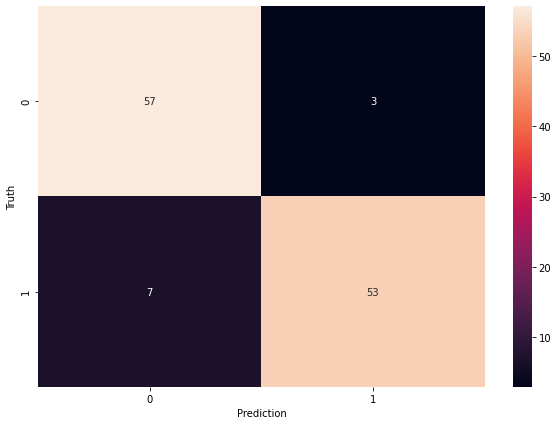

In [68]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# FastText

In [31]:
! pip install fasttext

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
import fasttext

**Train Custom Word Vectors in fastText :** https://github.com/codebasics/nlp-tutorials/blob/main/17_fasttext/fasttext_indian_food.ipynb          
**Text Classification Using fastText :** https://github.com/codebasics/nlp-tutorials/blob/main/18_fasttext_classification/fasttext_tutorial.ipynb

# Introduction to chat bots

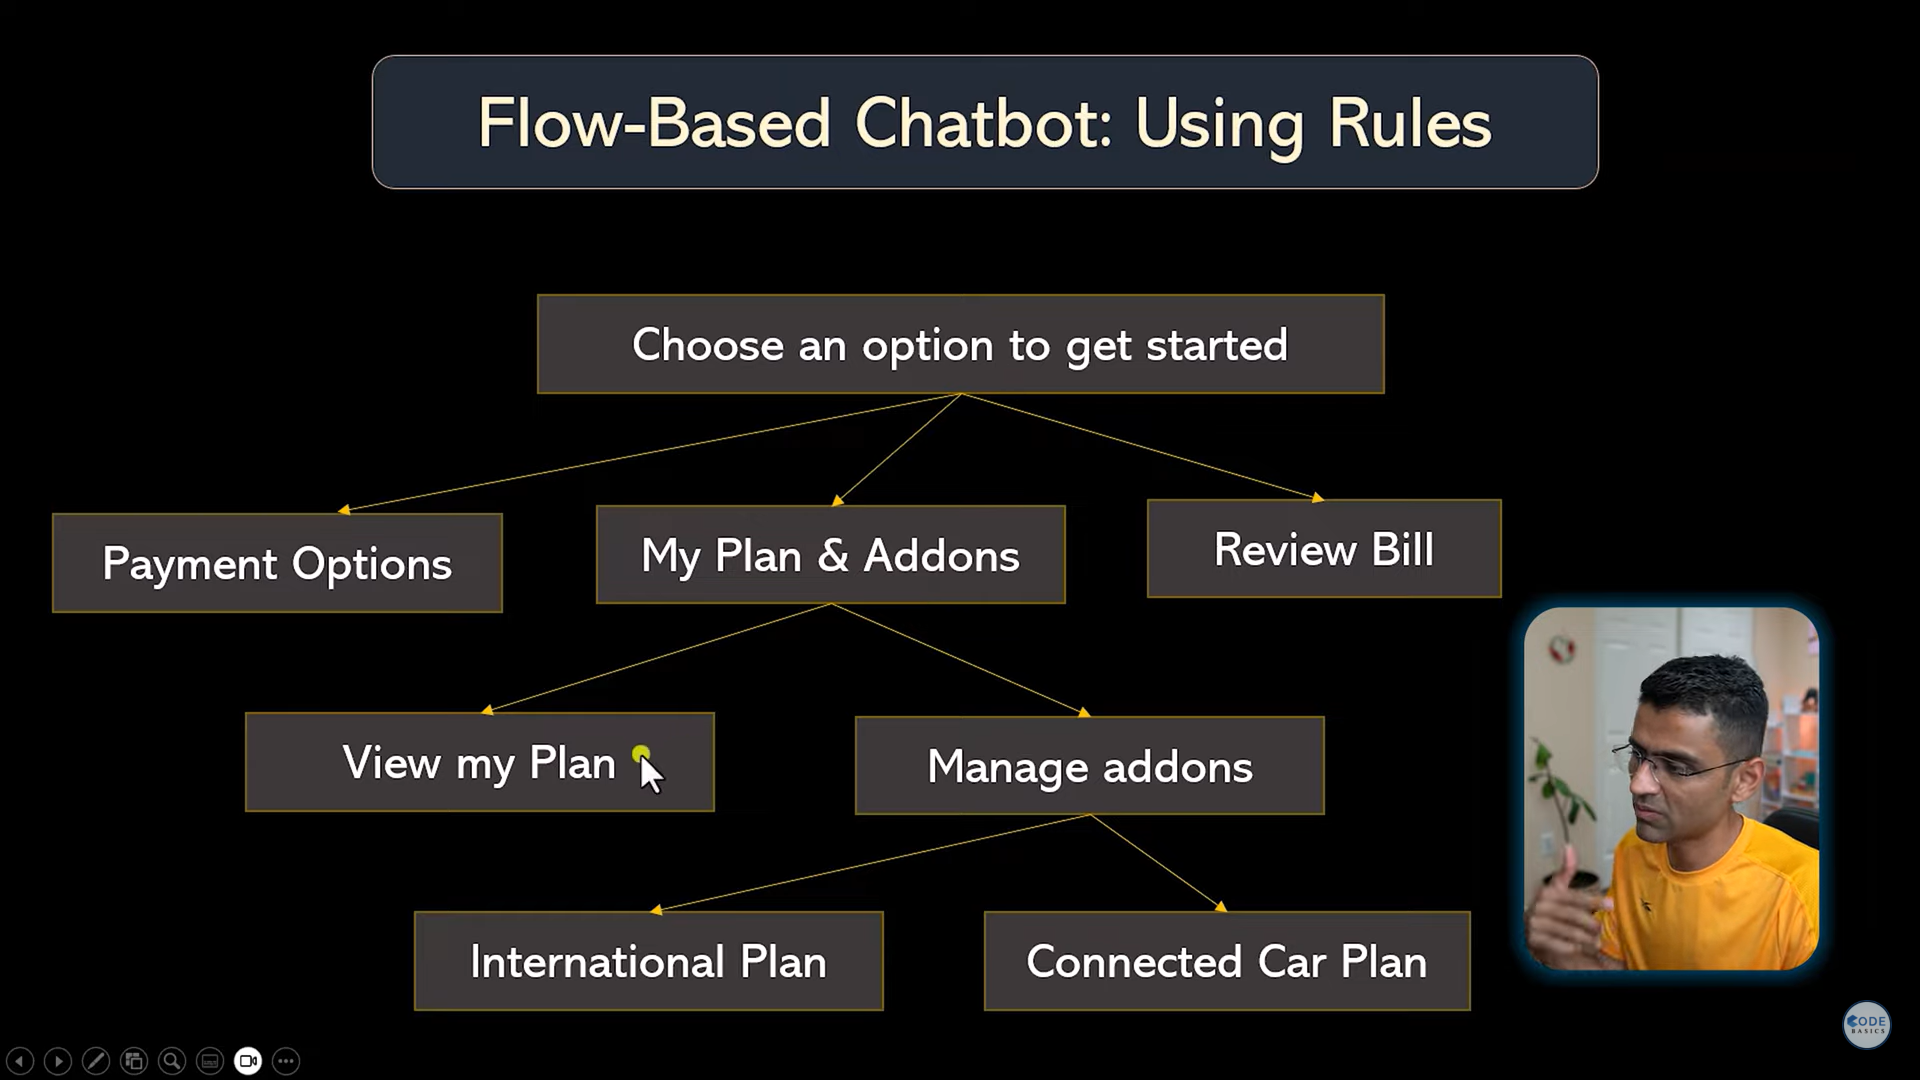

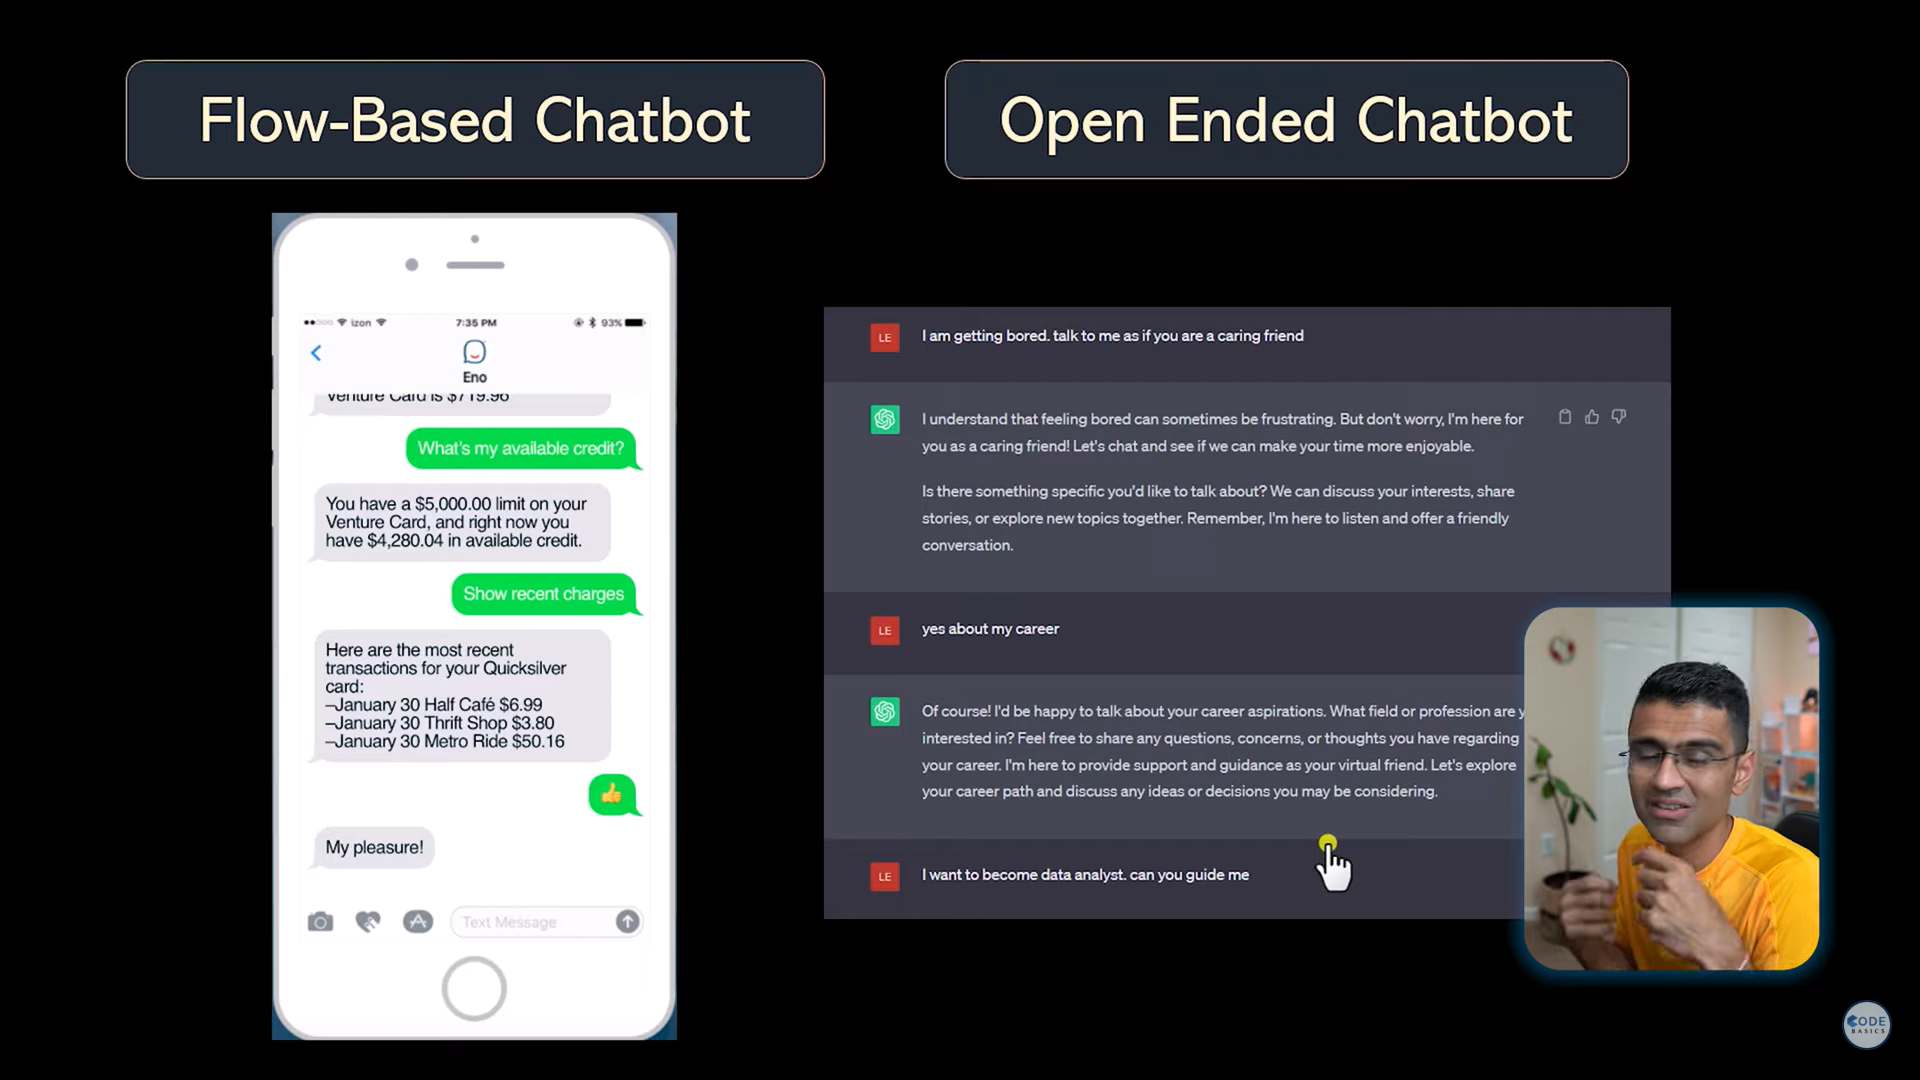

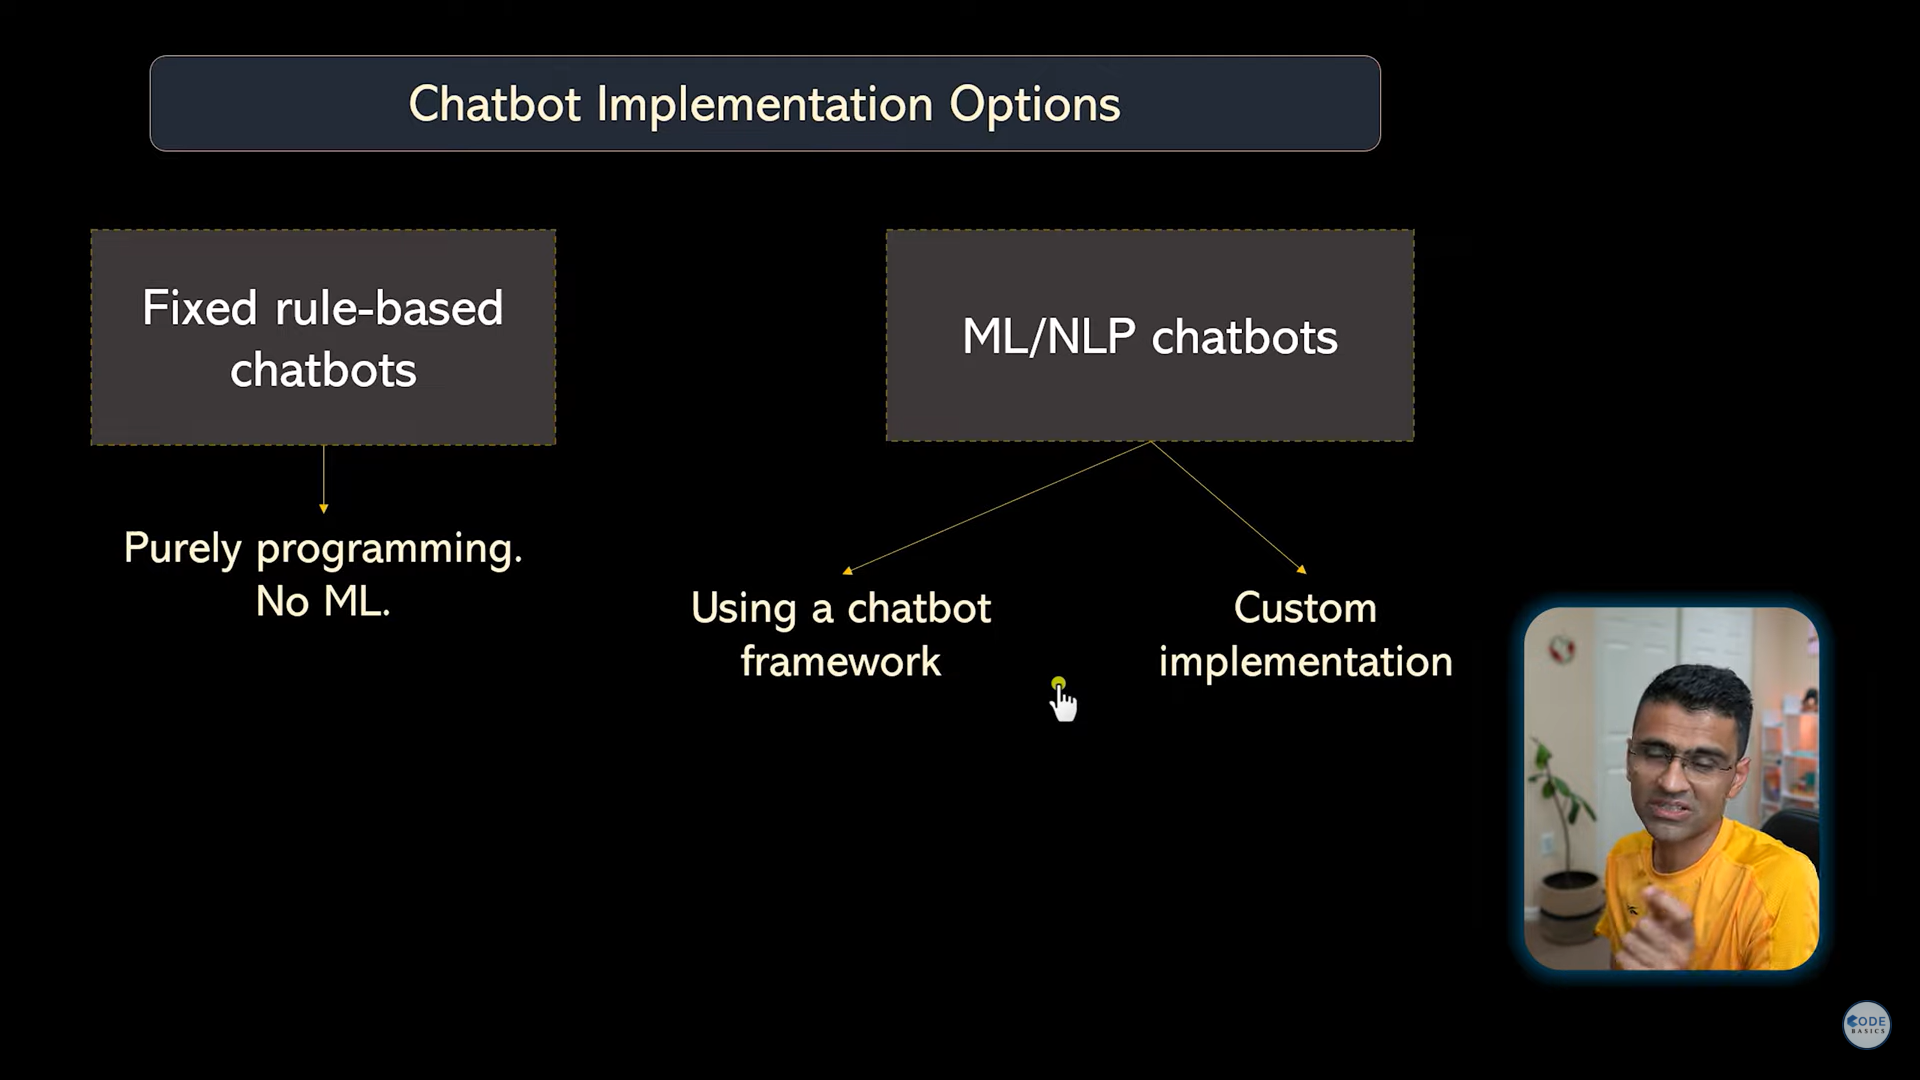

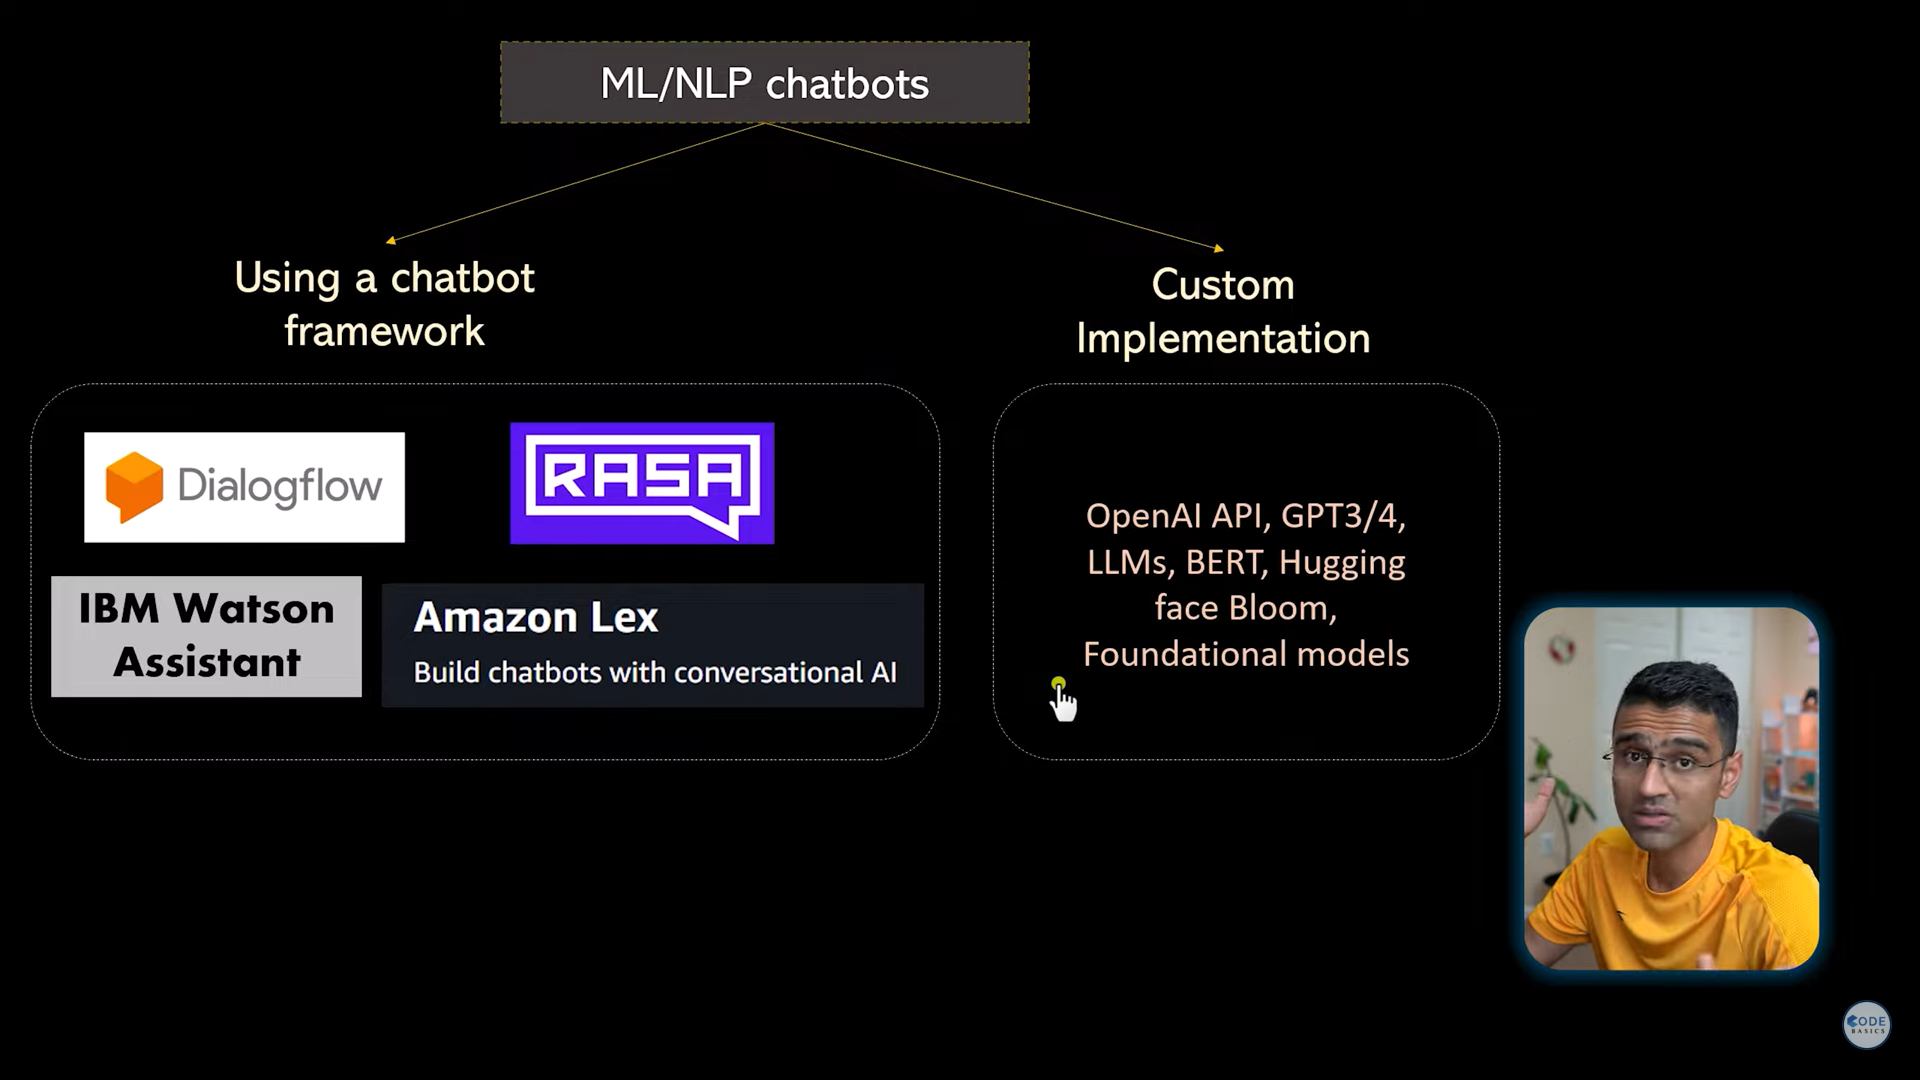

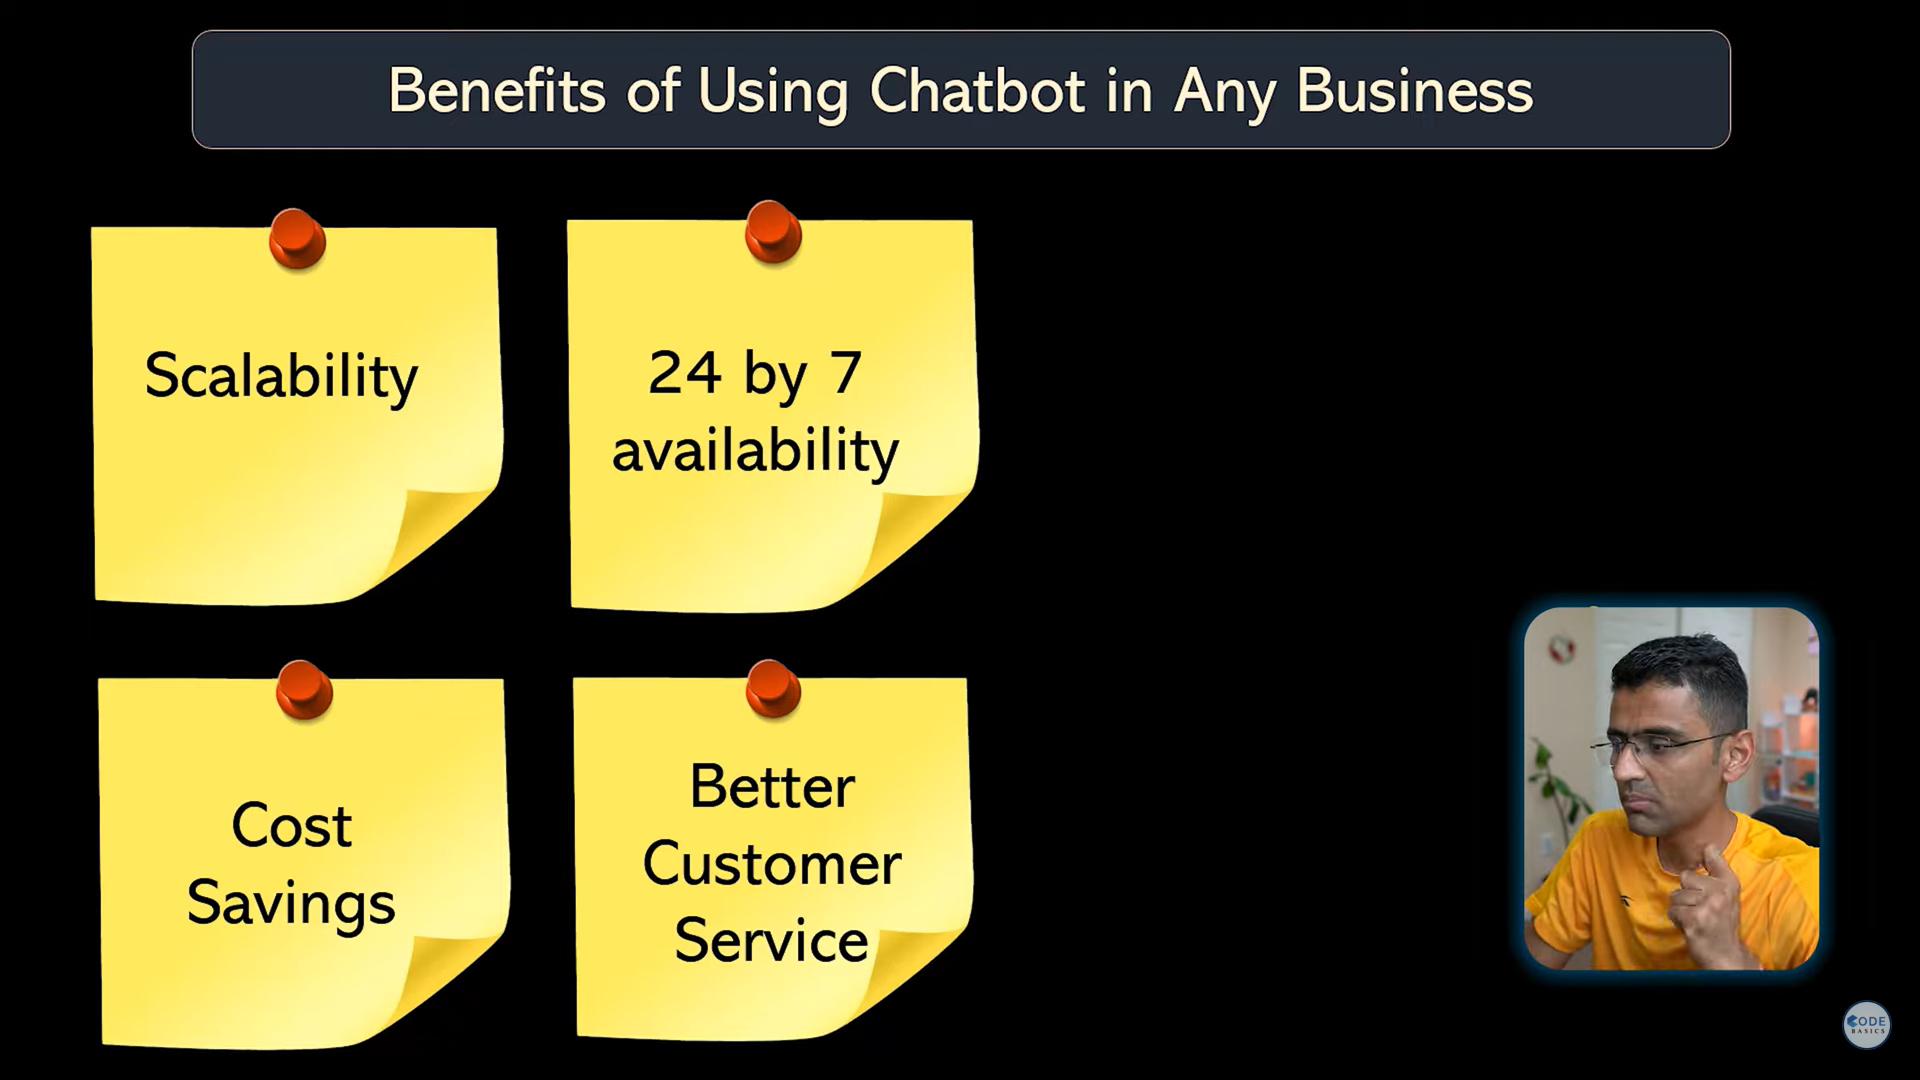